# Import
Make sure both FocusFeedbackAnalysis and FocusFeedbackGUI are installed

In [1]:
from focusfeedbackanalysis.track_analysis import TrackAnalysis
from ndbioimage import Imread
from matplotlib import pyplot as plt

In [2]:
file = "/DATA/lenstra_lab/w.pomp/data/20200509/YTL639_2020_05_09__12_40_46.czi"

# Visualize the contents of the time-lapse
Figure out which channels contain what  
Check metadata (time interval, pixel size)

In [3]:
im = Imread(file)

In [4]:
im

path/filename: /DATA/lenstra_lab/w.pomp/data/20200509/YTL639_2020_05_09__12_40_46.czi
series/pos:    0
reader:        cziread
dtype:         uint16
shape (ctyx):  2 x 1200 x 256 x 256
pixel size:    97.09 nm
exposuretime:  0.10 s
time interval: 1.002 s
binning:       1x1
laser colors:  642 | 488 nm
laser powers:  0.04 | 0.001 %
objective:     alpha Plan-Apochromat 100x/1.57 Oil-HI DIC Korr M27 Elyra
magnification: 160.0x
tubelens:      Lens 1,6x
filterset:     ['LBF 405/488/642', 'LBF 405/488/642']
gain:          100 100

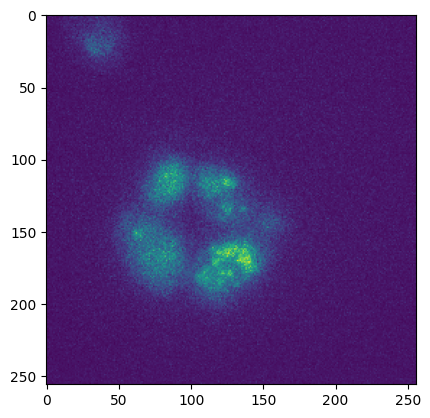

In [5]:
plt.imshow(im[0, 0])

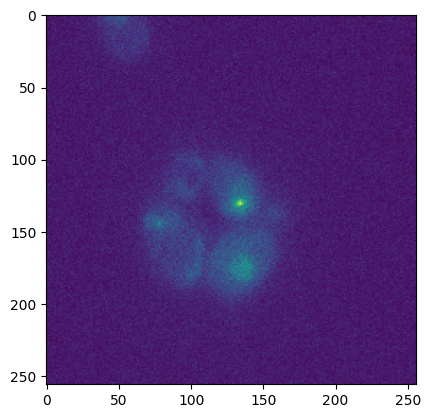

In [6]:
plt.imshow(im[1, 0])

# Start tracking pipeline for the time lapse
The first argument (image_file) is required, the rest is optional

In [7]:
print(TrackAnalysis.__doc__)


    Analyze a time-lapse to construct tracks. A track is constructed on
    the locations of a label (particle in the label channel) in each
    frame. If the label (or label channel) is absent, the track is
    constructed from the particle in the primary channel. Particles in the
    secondary channel (channel_secondary) are localized on or around the
    location of the label of primay track.

    If not done already for a previous analysis, the analysis will start
    with performing a calibration using z-stacks with beads. The argument
    'bead_files' can be used to give the bead files to be used for the
    calibration. If not specified, files in the same folder as the image
    file starting with 'beads' will be used. The channel configuration of
    these z-stacks should be the same as for the image file on which the
    analysis will be done. The calibration is used to determine the angle
    theta of the ellipses to fit, for a correction on the intensity of
    out-of-focus

the calibration results in a lot of plots
1. max intensity projection with detected beads annotated
2. ellipticity orientation histogram
3. horizontal and vertical psf width vs $z$ for each detected bead
4. x psf width ($\sigma_x$) for all beads, centered at $z=0$, fitted with a red line
5. y psf width ($\sigma_y$) for all beads, centered at $z=0$, fitted with a red line
6. ellipticity ($\frac{\sigma_x}{\sigma_y}$) vs $z$ for all beads,  
    red line: ratio of red lines in previous two plots  
    green line: fit, parameters shown below

In [8]:
# using the with .. as: pattern the tracking will be automatically
# saved at the end in a pickle file which can be read later
with TrackAnalysis(
    file,
    channel_primary=1,
    channel_secondary=0,
    path_out="/DATA/lenstra_lab/w.pomp/test/out/protocol",
    bead_files=(
        "/DATA/lenstra_lab/w.pomp/data/20200508/beads_2020_05_08__17_48_40.czi",
        "/DATA/lenstra_lab/w.pomp/data/20200508/beads_2020_05_08__17_49_35.czi",
        "/DATA/lenstra_lab/w.pomp/data/20200508/beads_2020_05_08__17_50_35.czi",
    ),
    wavelengths=(664, 510),
    colors=("green", "magenta"),
) as track:
    track.save_tracking()  # saves tracking tifs and tsv files (localization tables)
    track.plot()  # saves a trk_results_trace.pdf with the plots that can be seen starting a few
    # jupyter cells from here

Frame 492: 1 trajectories present.


          0/1200

Refitting localisations:   0%|          | 0/846 [00:00<?, ?it/s]

Finding secondary particles:   0%|          | 0/1200 [00:00<?, ?it/s]

Saving frames:   0%|          | 0/1200 [00:00<?, ?it/s]

Fitting background.


Fitting background localisations:   0%|          | 0/9600 [00:00<?, ?it/s]

Write files


Calculating kymograph:   0%|          | 0/1200 [00:00<?, ?it/s]

Calculating kymograph:   0%|          | 0/1200 [00:00<?, ?it/s]

# load track from pickle file
This can be done so the lengthy analysis can be split from the inspection of the analysis.  
Continuing with the track from the analysis above without loading from pickle file is also possible

In [9]:
track = TrackAnalysis.load("/DATA/lenstra_lab/w.pomp/test/out/protocol/YTL639_2020_05_09__12_40_46.pk")

In [10]:
track

TrackAnalysis(image_file=PosixPath('/DATA/lenstra_lab/w.pomp/data/20200509/YTL639_2020_05_09__12_40_46.czi'), channel_label=(), channel_primary=(1,), channel_secondary=(0,), channel_mask=1, dist_channel=(0, 3), dist_frame=(0, 5), path_out=PosixPath('/DATA/lenstra_lab/w.pomp/test/out/protocol'), calibration_path=PosixPath('/DATA/lenstra_lab/w.pomp/analysis/20200509'), mask_method=('square', 30), bead_files=[PosixPath('/DATA/lenstra_lab/w.pomp/data/20200508/beads_2020_05_08__17_48_40.czi'), PosixPath('/DATA/lenstra_lab/w.pomp/data/20200508/beads_2020_05_08__17_49_35.czi'), PosixPath('/DATA/lenstra_lab/w.pomp/data/20200508/beads_2020_05_08__17_50_35.czi')], wavelengths=(664, 510), colors=('green', 'magenta'), track3D=True)

In [11]:
track.bead_files

[PosixPath('/DATA/lenstra_lab/w.pomp/data/20200508/beads_2020_05_08__17_48_40.czi'),
 PosixPath('/DATA/lenstra_lab/w.pomp/data/20200508/beads_2020_05_08__17_49_35.czi'),
 PosixPath('/DATA/lenstra_lab/w.pomp/data/20200508/beads_2020_05_08__17_50_35.czi')]

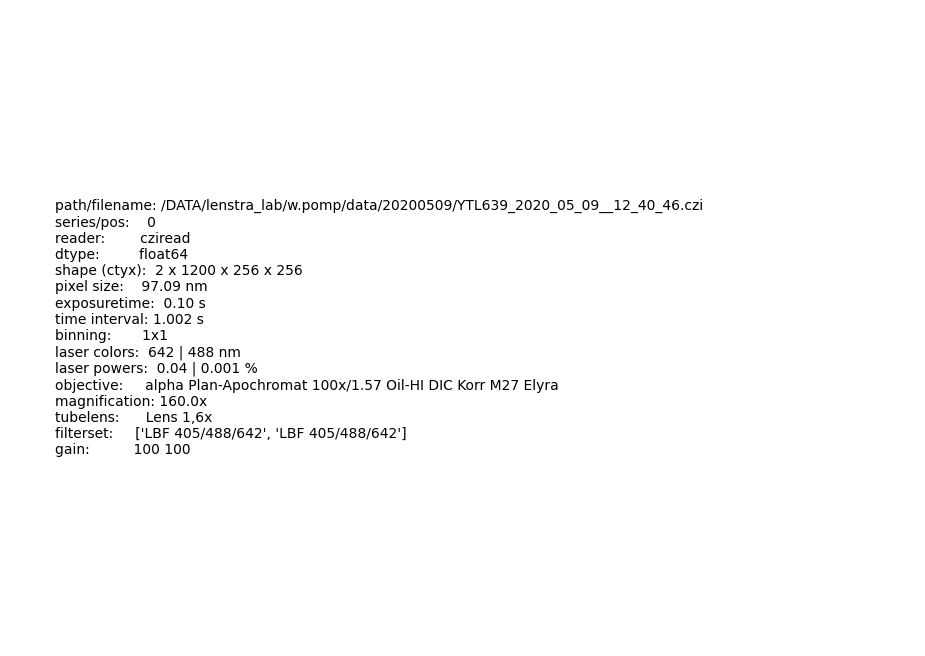

In [12]:
# image file metadata, verify correctness
track.plot_info()

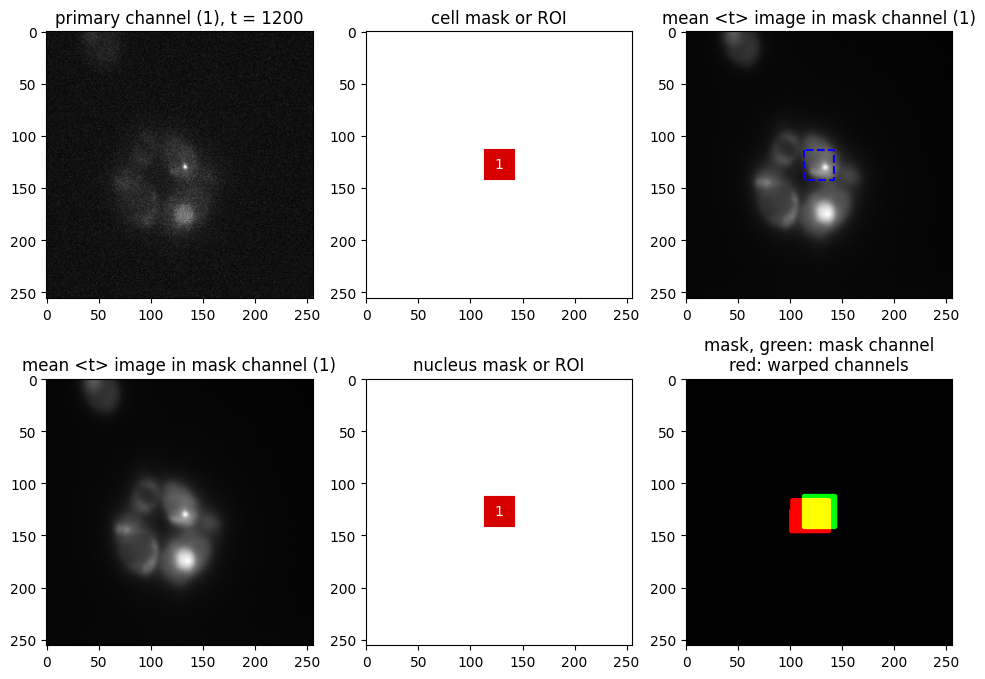

In [13]:
track.plot_mask()

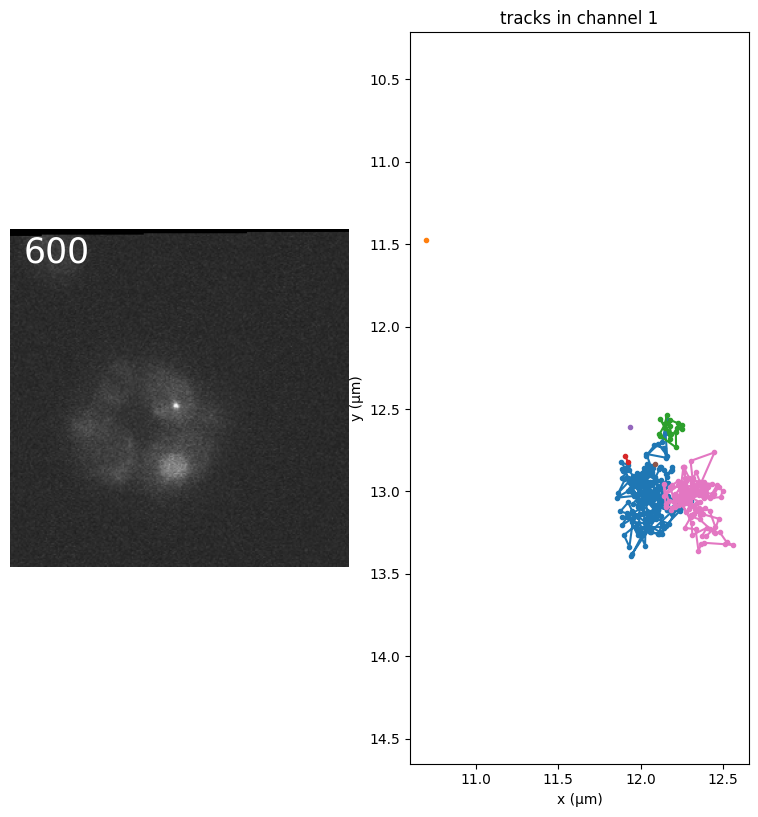

In [14]:
track.plot_localizations()

Calculating kymograph:   0%|          | 0/1200 [00:00<?, ?it/s]

Calculating kymograph:   0%|          | 0/1200 [00:00<?, ?it/s]

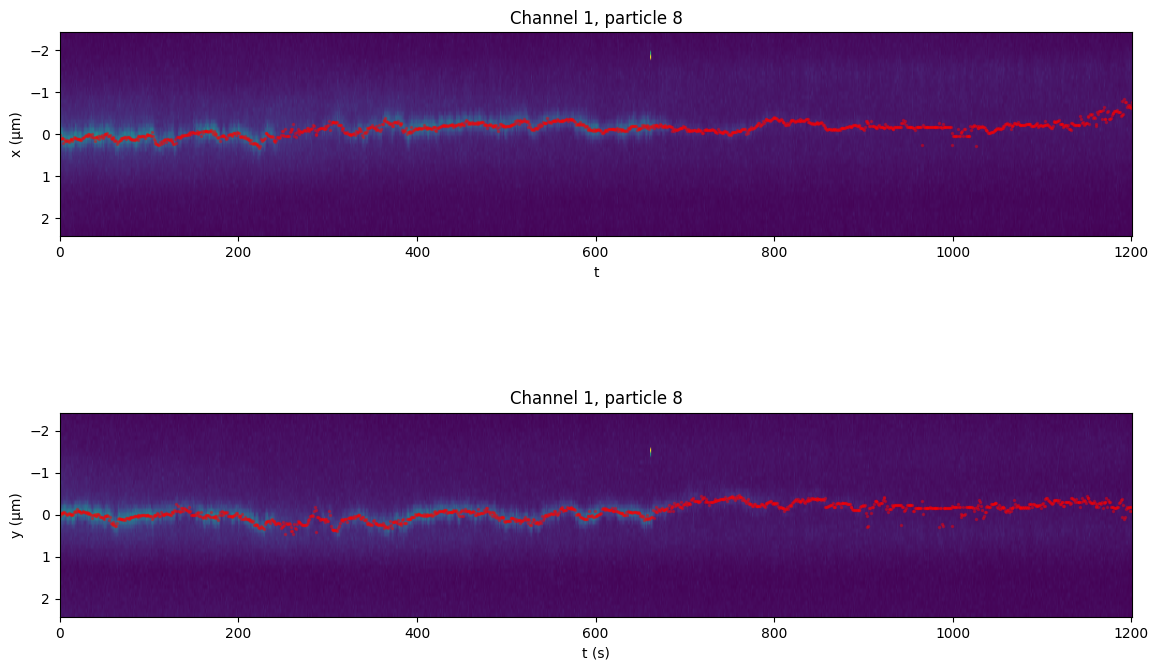

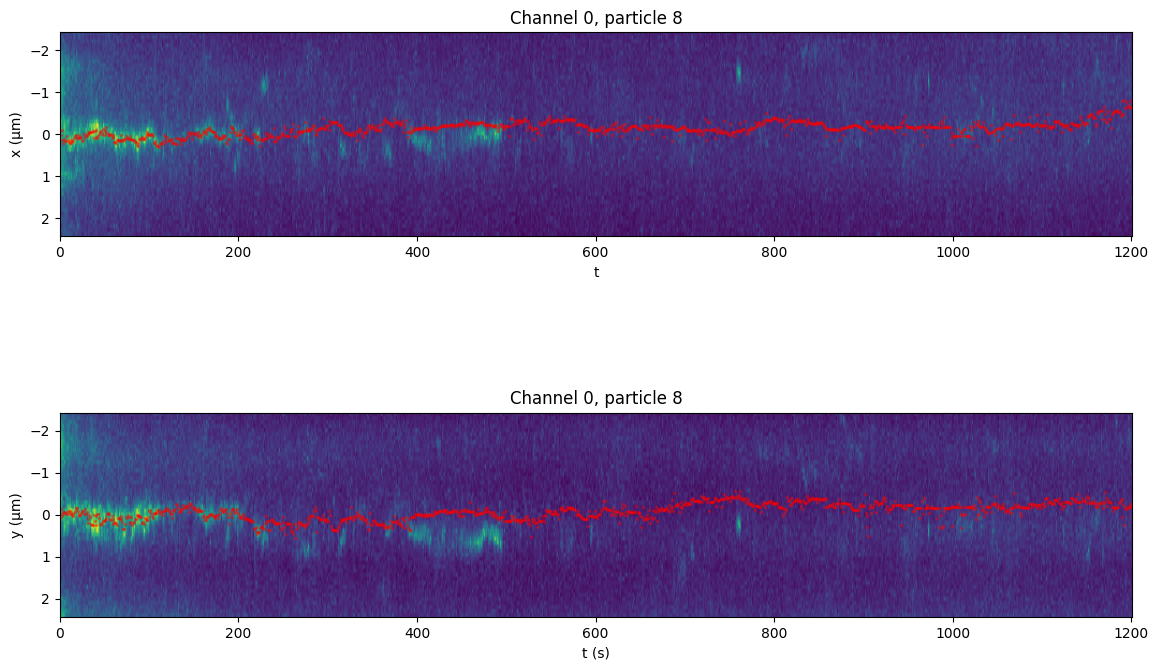

In [15]:
track.plot_kymograph()

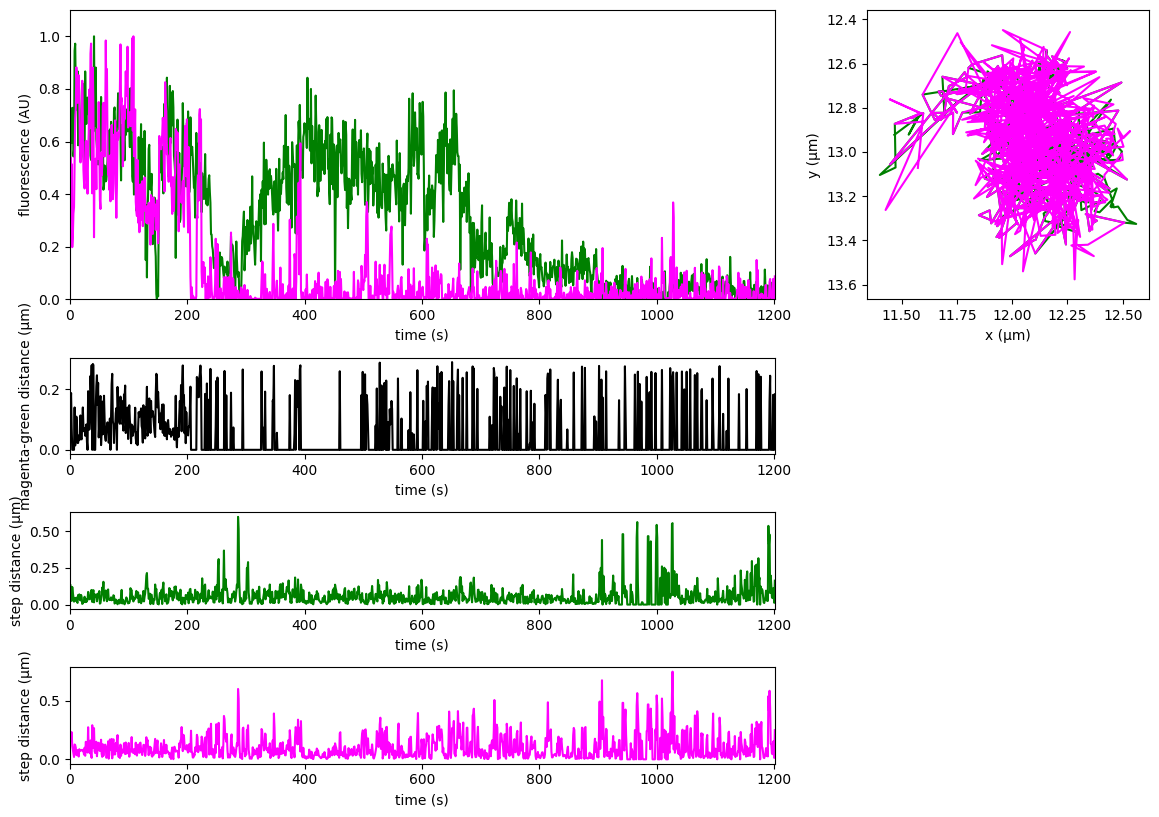

In [16]:
track.plot_traces()

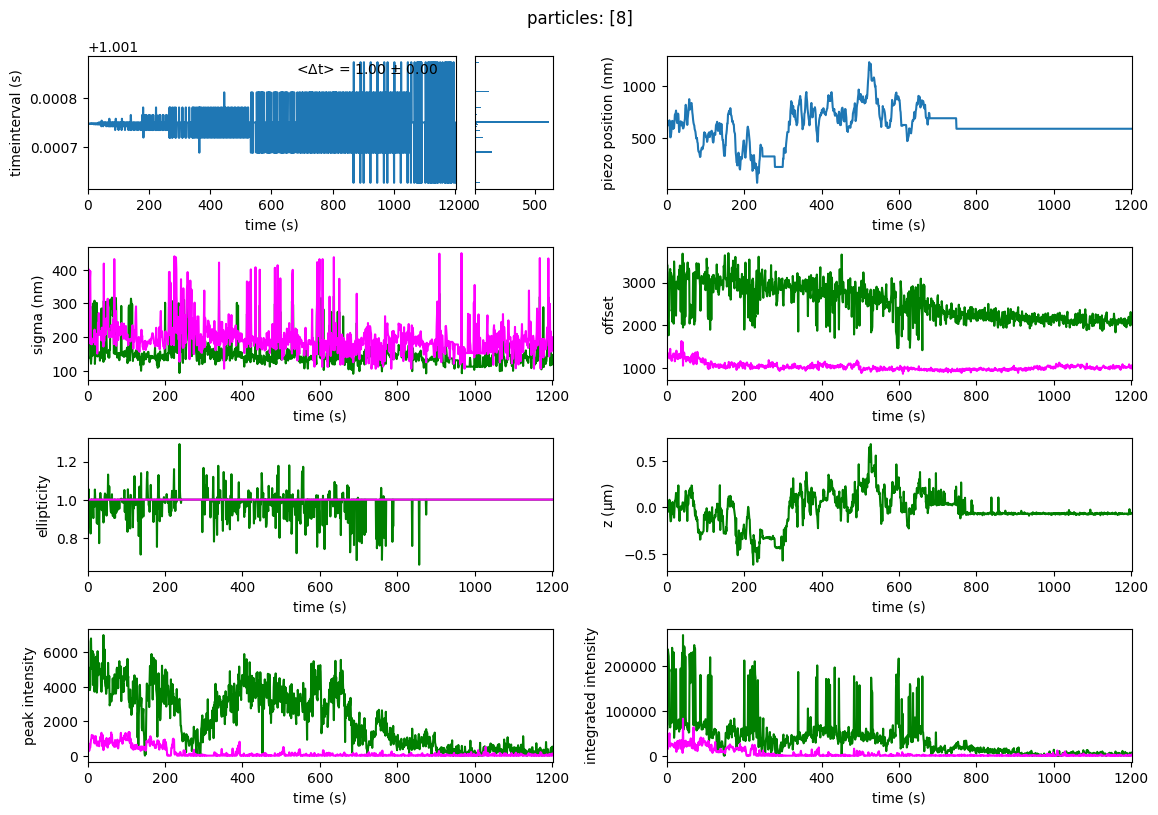

In [17]:
track.plot_traces_extra()

In [18]:
# no label, so no data there
track.loc_label

,C,R2,T,X2,Z,de,di,di_peak,do,dr,...,ds_um,dr_um,tiltx_um-1,dtiltx_um-1,tilty_um-1,dtilty_um-1,particle,i_peak_uc,di_peak_uc,link


In [19]:
# all (in this case 1) tracks in the primary channel
track.loc_primary

,C,R2,T,X2,Z,de,di,di_peak,do,dr,...,ds_um,dr_um,tiltx_um-1,dtiltx_um-1,tilty_um-1,dtilty_um-1,particle,i_peak_uc,di_peak_uc,link
0,1.0,0.817082,0.0,154213.425373,0.0,0.121746,19462.743937,2255.182895,359.613438,0.443559,...,0.024286,0.043064,-163.536684,878.510683,21.252397,862.155494,8.0,3146.496495,1903.933127,0.0
1,1.0,0.775023,1.0,323605.684823,0.0,0.129217,31223.971128,2929.539454,581.449602,NaN,...,0.039431,NaN,-1415.856421,1288.180604,948.924025,1345.050962,8.0,NaN,NaN,1.0
2,1.0,0.806985,2.0,408515.391834,0.0,0.134843,85186.141129,8901.654900,2350.851593,0.769926,...,0.030379,0.074750,448.237082,5636.400595,-395.292755,4313.369786,8.0,5074.857730,8901.653693,0.0
3,1.0,0.771905,3.0,307546.481279,0.0,0.099959,104285.653559,2373.237984,590.126254,0.622922,...,0.136312,0.060478,-326.735072,650.445916,412.674861,619.719659,8.0,4079.068188,2321.048383,0.0
4,1.0,0.732490,4.0,382978.068552,0.0,0.087451,115909.304200,2723.267071,653.107637,0.711050,...,0.149071,0.069034,-56.732344,712.166435,-2.239022,716.869169,8.0,3983.529499,2593.239005,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,1.0,0.173336,1195.0,74076.032085,0.0,0.790706,19110.029217,2741.512928,590.575029,NaN,...,0.241156,NaN,83.628344,1567.896074,-243.079217,1568.189357,8.0,NaN,NaN,2.0
1196,1.0,0.119705,1196.0,46983.548557,0.0,4.090487,39779.569253,3524.237422,1444.380828,NaN,...,2.239477,NaN,269.331645,2127.378374,471.328087,1608.195992,8.0,NaN,NaN,3.0
1197,1.0,0.251652,1197.0,75797.097310,0.0,0.677077,18654.075869,2748.521864,586.648942,NaN,...,0.212467,NaN,485.029644,1605.697782,-282.632273,1540.220652,8.0,NaN,NaN,2.0
1198,1.0,0.288006,1198.0,73490.953955,0.0,0.467280,13597.196369,1335.361072,257.199559,NaN,...,0.139810,NaN,18.776271,592.904545,562.164541,596.604111,8.0,NaN,NaN,1.0


In [20]:
# the brightest track in the primary channel
track.loc_primary_brightest

,C,R2,T,X2,Z,de,di,di_peak,do,dr,...,ds_um,dr_um,tiltx_um-1,dtiltx_um-1,tilty_um-1,dtilty_um-1,particle,i_peak_uc,di_peak_uc,link
0,1.0,0.817082,0.0,154213.425373,0.0,0.121746,19462.743937,2255.182895,359.613438,0.443559,...,0.024286,0.043064,-163.536684,878.510683,21.252397,862.155494,8.0,3146.496495,1903.933127,0.0
1,1.0,0.775023,1.0,323605.684823,0.0,0.129217,31223.971128,2929.539454,581.449602,NaN,...,0.039431,NaN,-1415.856421,1288.180604,948.924025,1345.050962,8.0,NaN,NaN,1.0
2,1.0,0.806985,2.0,408515.391834,0.0,0.134843,85186.141129,8901.654900,2350.851593,0.769926,...,0.030379,0.074750,448.237082,5636.400595,-395.292755,4313.369786,8.0,5074.857730,8901.653693,0.0
3,1.0,0.771905,3.0,307546.481279,0.0,0.099959,104285.653559,2373.237984,590.126254,0.622922,...,0.136312,0.060478,-326.735072,650.445916,412.674861,619.719659,8.0,4079.068188,2321.048383,0.0
4,1.0,0.732490,4.0,382978.068552,0.0,0.087451,115909.304200,2723.267071,653.107637,0.711050,...,0.149071,0.069034,-56.732344,712.166435,-2.239022,716.869169,8.0,3983.529499,2593.239005,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,1.0,0.173336,1195.0,74076.032085,0.0,0.790706,19110.029217,2741.512928,590.575029,NaN,...,0.241156,NaN,83.628344,1567.896074,-243.079217,1568.189357,8.0,NaN,NaN,2.0
1196,1.0,0.119705,1196.0,46983.548557,0.0,4.090487,39779.569253,3524.237422,1444.380828,NaN,...,2.239477,NaN,269.331645,2127.378374,471.328087,1608.195992,8.0,NaN,NaN,3.0
1197,1.0,0.251652,1197.0,75797.097310,0.0,0.677077,18654.075869,2748.521864,586.648942,NaN,...,0.212467,NaN,485.029644,1605.697782,-282.632273,1540.220652,8.0,NaN,NaN,2.0
1198,1.0,0.288006,1198.0,73490.953955,0.0,0.467280,13597.196369,1335.361072,257.199559,NaN,...,0.139810,NaN,18.776271,592.904545,562.164541,596.604111,8.0,NaN,NaN,1.0


In [21]:
# the secondary channel data associated with the brightest track in the primary channel
track.loc_secondary_brightest

,C,R2,T,X2,Z,de,di,di_peak,do,dr,...,ds_um,dr_um,tiltx_um-1,dtiltx_um-1,tilty_um-1,dtilty_um-1,particle,i_peak_uc,di_peak_uc,link
1200,0.0,0.339746,0.0,46041.955997,0.0,0.254476,20817.475487,912.131747,197.906686,NaN,...,0.130169,NaN,28.645190,313.667853,-268.304774,318.401209,8.0,NaN,NaN,0.0
1201,0.0,0.413284,1.0,56154.021373,0.0,0.192198,21354.201185,992.089624,210.349158,NaN,...,0.095174,NaN,94.587039,336.567576,-85.419144,353.822117,8.0,NaN,NaN,1.0
1202,0.0,0.245391,2.0,46519.218959,0.0,0.270809,25889.720296,1005.345325,232.849818,NaN,...,0.159690,NaN,93.359397,337.909422,-69.455013,337.845918,8.0,NaN,NaN,0.0
1203,0.0,0.473872,3.0,36005.651901,0.0,0.212379,21925.841211,1318.741514,321.973088,NaN,...,0.108367,NaN,-114.073643,561.801794,19.933078,559.665914,8.0,NaN,NaN,0.0
1204,0.0,0.316695,4.0,53548.329618,0.0,0.282137,56298.633878,683.216989,184.671554,NaN,...,0.319437,NaN,-301.729793,135.006847,133.075729,138.517336,8.0,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,0.0,0.034482,1195.0,10696.272521,0.0,4.147710,7548.571290,586.911857,198.339702,NaN,...,1.589257,NaN,-13.791920,262.280637,-93.695199,260.753558,8.0,NaN,NaN,2.0
2396,0.0,0.068905,1196.0,13687.408982,0.0,0.915533,7756.684197,645.191795,131.092861,NaN,...,0.323312,NaN,-16.863227,273.177619,46.542361,298.309781,8.0,NaN,NaN,3.0
2397,0.0,0.010820,1197.0,10228.382617,0.0,14.063114,7098.755234,570.065901,243.670018,NaN,...,5.289945,NaN,52.287348,255.281985,10.793947,245.763412,8.0,NaN,NaN,2.0
2398,0.0,0.010429,1198.0,14931.135289,0.0,25.613428,22289.290768,1059.592399,784.283580,NaN,...,17.171278,NaN,50.239105,450.861028,43.454018,396.212068,8.0,NaN,NaN,1.0


In [22]:
# selecting some interesting columns
track.loc_primary_brightest[["t", "i", "i_peak", "x_um", "y_um", "z_um"]]

,t,i,i_peak,x_um,y_um,z_um
0,0.000000,45238.329363,3640.387740,12.240645,13.041280,-0.096478
1,1.001747,56890.577780,3842.586367,12.349963,12.968445,-0.006119
2,2.003495,61773.538605,5074.858405,12.318872,13.005372,-0.016197
3,3.005243,236361.709987,4156.504430,12.314898,12.980723,-0.048924
4,4.006990,229468.836901,4158.282395,12.431935,12.954246,0.043471
...,...,...,...,...,...,...
1195,1197.088250,4270.832910,453.792637,11.582645,12.824065,-0.056119
1196,1198.090000,968.084646,68.635324,11.531504,12.921682,-0.066119
1197,1199.091750,4720.411435,513.057966,11.585675,12.824026,-0.069119
1198,1200.093500,7094.973900,494.148021,11.597598,12.824900,-0.067119


In [23]:
# selecting some interesting columns
track.loc_secondary_brightest[["t", "i", "i_peak", "x_um", "y_um", "z_um"]]

,t,i,i_peak,x_um,y_um,z_um
1200,0.000000,15319.711623,500.425122,12.143733,13.081833,NaN
1201,1.001747,21511.317595,736.854204,12.242301,12.879186,NaN
1202,2.003495,15701.118081,462.633063,12.131425,12.998071,NaN
1203,3.005243,15218.236796,702.724879,12.358149,13.040168,NaN
1204,4.006990,28924.529057,271.326576,12.431935,12.954246,NaN
...,...,...,...,...,...,...
2395,1197.088250,350.544699,20.126580,11.582645,12.824065,NaN
2396,1198.090000,1742.128299,106.310414,11.445947,12.761725,NaN
2397,1199.091750,100.000000,5.873112,11.585675,12.824026,NaN
2398,1200.093500,100.000000,3.763466,11.597598,12.824900,NaN
